- (c) Ken-ichi Fukui, 2020/01/17
- MIT License

## k近傍法によるIrisデータの識別と識別境界面のプロット

In [1]:
%matplotlib inline
from sklearn import datasets
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### データの読み込みと標準化

In [2]:
# K近傍法の近傍数パラメータ k
neighbors = 5
# テストデータ分割のための乱数のシード（整数値）
random_seed = 1
#　テストデータの割合
test_proportion = 0.3
# Iris データセットをロード 
iris = datasets.load_iris()
# 使用する特徴の次元を(Irisの場合は0,1,2,3から)2つ指定．d1とd2は異なる次元を指定すること
d1 = 0
d2 = 1
# d1,d2列目の特徴量を使用 
X = iris.data[:, [d1, d2]]
# クラスラベルを取得
y = iris.target
# z標準化
X_std = scale(X)

### データをトレーニングデータとテストデータに分割

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = test_proportion,random_state = random_seed)

### クラスKNeighborsClassifierを使用してk近傍法のインスタンスを生成

In [4]:
knn = KNeighborsClassifier(n_neighbors=neighbors)

### k近傍法のモデルにトレーニングデータを適合

In [5]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 分類精度の算出

In [6]:
acc_train = accuracy_score(y_train, knn.predict(X_train))
acc_test  = accuracy_score(y_test, knn.predict(X_test))
print('k=%d, features=(%d,%d)' % (neighbors, d1, d2))
print('accuracy for training data: %f' % acc_train)
print('accuracy for test data: %f' % acc_test)

k=5, features=(0,1)
accuracy for training data: 0.857143
accuracy for test data: 0.688889


### 識別境界面をプロットする関数
各格子点に対してk近傍法で識別を行い，識別結果に応じて色を付けている

In [7]:
def plot_decision_boundary():
    x1_min, x1_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    x2_min, x2_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
                       
    Z = knn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    plt.figure(figsize=(10,10))
    plt.subplot(211)

    plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y_train)):
        plt.scatter(x=X_train[y_train == cl, 0], y=X_train[y_train == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl)


    plt.xlabel('sepal length [standardized]')
    plt.ylabel('sepal width [standardized]')
    plt.title('train_data')

    plt.subplot(212)

    plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y_test)):
        plt.scatter(x=X_test[y_test == cl, 0], y=X_test[y_test == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl)


    plt.xlabel('sepal length [standardized]')
    plt.ylabel('sepal width [standardized]')
    plt.title('test_data')
    plt.show()

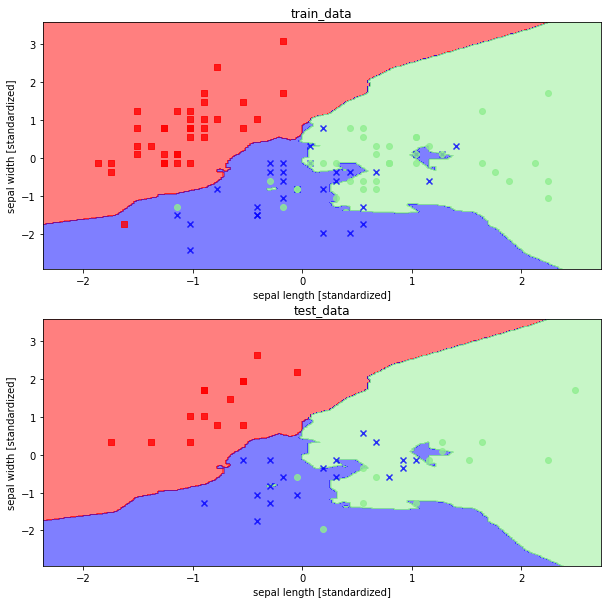

In [8]:
plot_decision_boundary()

### k=1から80まで変化させてAccuracyの変化をみてみる
データの分割に用いる乱数を変化させて100回実行し平均Accuuracyを算出している

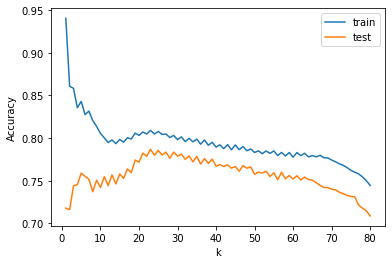

In [9]:
acc_train_ave, acc_test_ave, num_k = [],[],[]
for k in range(80):
    acc_train, acc_test = [], []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X_std, y, 
                                                            test_size = test_proportion, random_state = i+1)
        knn = KNeighborsClassifier(n_neighbors=k+1)
        knn.fit(X_train, y_train)
        acc_train.append(accuracy_score(y_train, knn.predict(X_train)))
        acc_test.append(accuracy_score(y_test, knn.predict(X_test)))
    acc_train_ave.append(np.mean(acc_train))
    acc_test_ave.append(np.mean(acc_test))
    num_k.append(k+1)
    
plt.plot(num_k, acc_train_ave, label="train")
plt.plot(num_k, acc_test_ave, label="test")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()